# Linear Regression Project : PCOS Diagnostics

# Data Acquisition

In [1]:
# import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load dataset
data= pd.read_csv('PCOS_data.csv')

In [3]:
#read the data
data

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,1.0,0,28,44.6,152.000,19.304017,15.0,78,22.0,...,0,1.0,0,110.0,80.0,3,3,18.0,18.0,8.5
1,2,2.0,0,36,65.0,161.500,24.921163,15.0,74,20.0,...,0,0.0,0,NaN,NaN,3,5,15.0,14.0,3.7
2,3,3.0,1,33,68.8,165.000,25.270891,11.0,72,18.0,...,1,1.0,0,NaN,80.0,13,15,18.0,20.0,10.0
3,4,4.0,0,37,65.0,148.000,29.674945,NaN,72,20.0,...,0,0.0,0,NaN,NaN,2,2,15.0,14.0,7.5
4,5,5.0,0,25,52.0,161.000,20.060954,11.0,72,NaN,...,0,0.0,0,NaN,80.0,3,4,16.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,537,NaN,0,35,50.0,164.592,18.456637,17.0,72,16.0,...,0,0.0,0,110.0,NaN,1,0,17.5,10.0,6.7
537,538,538.0,0,30,63.2,158.000,25.316456,15.0,72,18.0,...,0,0.0,0,110.0,NaN,9,7,19.0,18.0,8.2
538,539,539.0,0,36,54.0,152.000,23.372576,NaN,74,20.0,...,0,0.0,0,110.0,80.0,1,0,18.0,9.0,7.3
539,540,540.0,0,27,50.0,150.000,22.222222,15.0,74,20.0,...,1,0.0,0,110.0,NaN,7,6,18.0,16.0,11.5


# Information about dataset

In [4]:
#shape of the data i.e no. of rows and columns
data.shape

(541, 44)

In [5]:
# top 10 rows
data.head(10)

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,1.0,0,28,44.6,152.0,19.304017,15.0,78,22.0,...,0,1.0,0,110.0,80.0,3,3,18.0,18.0,8.5
1,2,2.0,0,36,65.0,161.5,24.921163,15.0,74,20.0,...,0,0.0,0,NaN,NaN,3,5,15.0,14.0,3.7
2,3,3.0,1,33,68.8,165.0,25.270891,11.0,72,18.0,...,1,1.0,0,NaN,80.0,13,15,18.0,20.0,10.0
3,4,4.0,0,37,65.0,148.0,29.674945,NaN,72,20.0,...,0,0.0,0,NaN,NaN,2,2,15.0,14.0,7.5
4,5,5.0,0,25,52.0,161.0,20.060954,11.0,72,NaN,...,0,0.0,0,NaN,80.0,3,4,16.0,14.0,7.0
5,6,6.0,0,36,74.1,165.0,27.217631,15.0,78,28.0,...,0,0.0,0,110.0,NaN,9,6,16.0,20.0,8.0
6,7,7.0,0,34,64.0,156.0,26.298488,11.0,72,18.0,...,0,0.0,0,NaN,80.0,6,6,15.0,16.0,6.8
7,8,NaN,0,33,58.5,159.0,23.139907,NaN,72,20.0,...,0,0.0,0,NaN,80.0,7,6,15.0,18.0,7.1
8,9,9.0,0,32,40.0,158.0,16.023073,11.0,72,18.0,...,0,0.0,0,NaN,80.0,5,7,17.0,17.0,4.2
9,10,10.0,0,36,52.0,150.0,23.111111,15.0,80,20.0,...,0,0.0,0,110.0,80.0,1,1,14.0,17.0,2.5


In [6]:
# bottom 10 rows
data.tail(10)

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
531,532,532.0,0,34,70.0,164.000,26.026175,11.0,72,22.0,...,0,0.0,0,NaN,NaN,2,0,21.0,16.0,8.5
532,533,NaN,0,39,56.0,158.496,22.292122,12.0,72,22.0,...,0,0.0,0,130.0,80.0,9,7,17.0,18.0,7.0
533,534,534.0,1,26,53.5,161.544,20.500862,14.0,70,18.0,...,1,0.0,0,110.0,80.0,8,10,18.0,18.0,10.3
534,535,535.0,0,24,48.0,158.496,19.107533,14.0,70,NaN,...,0,0.0,0,110.0,80.0,7,7,20.0,19.0,8.2
535,536,536.0,0,26,80.0,161.544,30.655494,18.0,70,18.0,...,0,0.0,0,110.0,80.0,7,9,13.0,17.5,9.6
536,537,NaN,0,35,50.0,164.592,18.456637,17.0,72,16.0,...,0,0.0,0,110.0,NaN,1,0,17.5,10.0,6.7
537,538,538.0,0,30,63.2,158.000,25.316456,15.0,72,18.0,...,0,0.0,0,110.0,NaN,9,7,19.0,18.0,8.2
538,539,539.0,0,36,54.0,152.000,23.372576,NaN,74,20.0,...,0,0.0,0,110.0,80.0,1,0,18.0,9.0,7.3
539,540,540.0,0,27,50.0,150.000,22.222222,15.0,74,20.0,...,1,0.0,0,110.0,NaN,7,6,18.0,16.0,11.5
540,541,NaN,1,23,82.0,165.000,30.119376,NaN,80,NaN,...,1,1.0,0,NaN,NaN,9,10,19.0,18.0,6.9


In [7]:
# describe :count,max,min
data.describe(include='all')

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,512.000000,541.000000,541.000000,541.000000,541.000000,541.000000,406.000000,541.000000,476.000000,...,541.000000,540.000000,541.000000,288.000000,382.000000,541.000000,541.000000,541.000000,541.000000,541.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,271.000000,270.681641,0.327172,31.430684,59.637153,156.484835,24.319360,14.068966,73.247689,19.245798,...,0.489834,0.514815,0.247689,109.972222,79.811518,6.129390,6.641405,15.018115,15.451701,8.475915
std,156.317519,155.611081,0.469615,5.411006,11.028287,6.033545,4.050810,2.057248,4.430285,1.725500,...,0.500359,0.500244,0.432070,7.444049,3.958588,4.229294,4.436889,3.566839,3.318848,2.165381
min,1.000000,1.000000,0.000000,20.000000,31.000000,137.000000,12.417882,11.000000,13.000000,16.000000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,136.000000,137.750000,0.000000,28.000000,52.000000,152.000000,21.707923,11.000000,72.000000,18.000000,...,0.000000,0.000000,0.000000,110.000000,80.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,271.000000,274.500000,0.000000,31.000000,59.000000,156.000000,24.238227,15.000000,72.000000,18.000000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,406.000000,405.250000,1.000000,35.000000,65.000000,160.000000,26.638918,15.000000,74.000000,20.000000,...,1.000000,1.000000,0.000000,110.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000


In [8]:
#it will display information about that object, including its data type, attributes, and methods, if available. 
#This information is provided interactively to help you understand the object better.
data.info

<bound method DataFrame.info of      Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  \
0         1               1.0           0          28         44.6   
1         2               2.0           0          36         65.0   
2         3               3.0           1          33         68.8   
3         4               4.0           0          37         65.0   
4         5               5.0           0          25         52.0   
..      ...               ...         ...         ...          ...   
536     537               NaN           0          35         50.0   
537     538             538.0           0          30         63.2   
538     539             539.0           0          36         54.0   
539     540             540.0           0          27         50.0   
540     541               NaN           1          23         82.0   

     Height(Cm)         BMI  Blood Group  Pulse rate(bpm)   RR (breaths/min)  \
0        152.000  19.304017         15.0       

In [9]:
#it provides a concise summary of the DataFrame's structure,
#including the number of non-null values, data types of columns, and memory usage. 
#It's a useful method for quickly assessing the basic characteristics of your data.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        512 non-null    float64
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             406 non-null    float64
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        476 non-null    float64
 10  Hb(g/dl)                519 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [10]:
#any null value present
data.isnull().values.any()

True

In [11]:
# check the null values entirely present in the dataset
data.isnull()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
537,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
538,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
539,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [12]:
# number of null values in each column
data.isnull().sum()

Sl. No                      0
Patient File No.           29
PCOS (Y/N)                  0
 Age (yrs)                  0
Weight (Kg)                 0
Height(Cm)                  0
BMI                         0
Blood Group               135
Pulse rate(bpm)             0
RR (breaths/min)           65
Hb(g/dl)                   22
Cycle(R/I)                  0
Cycle length(days)          0
Marraige Status (Yrs)       1
Pregnant(Y/N)               0
No. of aborptions           0
  I   beta-HCG(mIU/mL)      0
II    beta-HCG(mIU/mL)      0
FSH(mIU/mL)                 0
LH(mIU/mL)                  0
FSH/LH                      0
Hip(inch)                   0
Waist(inch)                 0
Waist:Hip Ratio             0
TSH (mIU/L)                 0
AMH(ng/mL)                  0
PRL(ng/mL)                  0
Vit D3 (ng/mL)              0
PRG(ng/mL)                  0
RBS(mg/dl)                  0
Weight gain(Y/N)            0
hair growth(Y/N)            0
Skin darkening (Y/N)        0
Hair loss(

<Axes: >

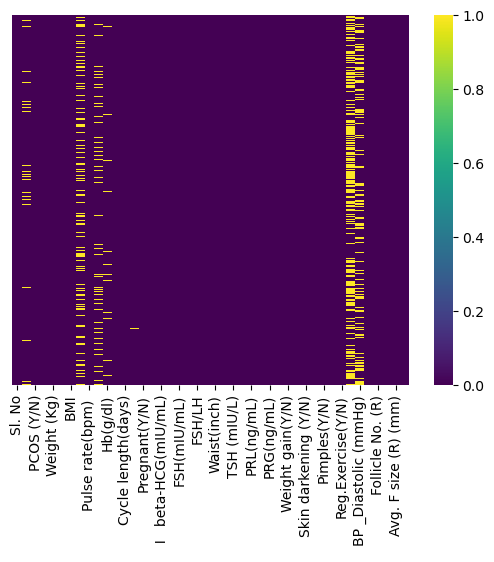

In [13]:
# to illustrate null values using heatmap
sns.heatmap(data.isnull(), yticklabels=False,cmap='viridis')

# Filling missing values

In [14]:
#filling missing values using bfill, ffill, fillna
data['Blood Group'].fillna(18, inplace=True)
data['RR (breaths/min)'].bfill(axis=0, inplace=True)
data['Hb(g/dl)']=data['Hb(g/dl)'].fillna(data['Hb(g/dl)'].mean())
data['BP _Systolic (mmHg)'].fillna(120, inplace=True)
data['BP _Diastolic (mmHg)'].fillna(80, inplace=True)
data['Patient File No.'].ffill(axis=0, inplace=True)

In [15]:
data

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,1.0,0,28,44.6,152.000,19.304017,15.0,78,22.0,...,0,1.0,0,110.0,80.0,3,3,18.0,18.0,8.5
1,2,2.0,0,36,65.0,161.500,24.921163,15.0,74,20.0,...,0,0.0,0,120.0,80.0,3,5,15.0,14.0,3.7
2,3,3.0,1,33,68.8,165.000,25.270891,11.0,72,18.0,...,1,1.0,0,120.0,80.0,13,15,18.0,20.0,10.0
3,4,4.0,0,37,65.0,148.000,29.674945,18.0,72,20.0,...,0,0.0,0,120.0,80.0,2,2,15.0,14.0,7.5
4,5,5.0,0,25,52.0,161.000,20.060954,11.0,72,28.0,...,0,0.0,0,120.0,80.0,3,4,16.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,537,536.0,0,35,50.0,164.592,18.456637,17.0,72,16.0,...,0,0.0,0,110.0,80.0,1,0,17.5,10.0,6.7
537,538,538.0,0,30,63.2,158.000,25.316456,15.0,72,18.0,...,0,0.0,0,110.0,80.0,9,7,19.0,18.0,8.2
538,539,539.0,0,36,54.0,152.000,23.372576,18.0,74,20.0,...,0,0.0,0,110.0,80.0,1,0,18.0,9.0,7.3
539,540,540.0,0,27,50.0,150.000,22.222222,15.0,74,20.0,...,1,0.0,0,110.0,80.0,7,6,18.0,16.0,11.5


In [16]:
# number of null values in each column
data.isnull().sum()

Sl. No                    0
Patient File No.          0
PCOS (Y/N)                0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          1
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     1
Pregnant(Y/N)             0
No. of aborptions         0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                0
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)     

<Axes: >

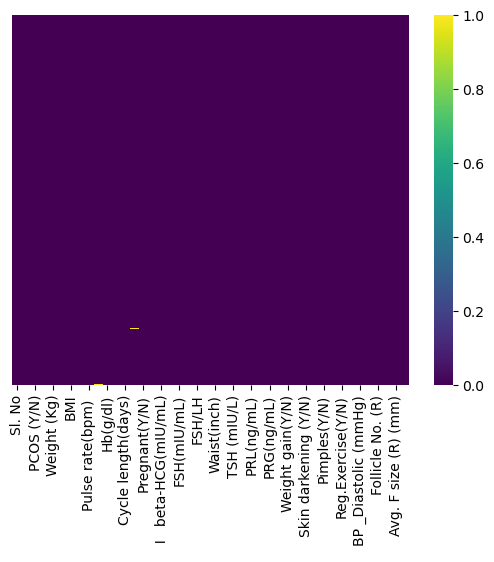

In [17]:
# to illustrate null values using heatmap
sns.heatmap(data.isnull(), yticklabels=False,cmap='viridis')

# Statistical Data

In [18]:
#calculate stastical data
data.mean()
data.median()
data.mode()
data.std()
data.sem()
data.var()
data.quantile()

C:\Users\Diksha\AppData\Local\Temp\ipykernel_8520\1134502452.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.mean()
C:\Users\Diksha\AppData\Local\Temp\ipykernel_8520\1134502452.py:3: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.median()
C:\Users\Diksha\AppData\Local\Temp\ipykernel_8520\1134502452.py:5: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or

Sl. No                    271.000000
Patient File No.          271.000000
PCOS (Y/N)                  0.000000
 Age (yrs)                 31.000000
Weight (Kg)                59.000000
Height(Cm)                156.000000
BMI                        24.238227
Blood Group                15.000000
Pulse rate(bpm)            72.000000
RR (breaths/min)           18.000000
Hb(g/dl)                   11.000000
Cycle(R/I)                  2.000000
Cycle length(days)          5.000000
Marraige Status (Yrs)       7.000000
Pregnant(Y/N)               0.000000
No. of aborptions           0.000000
  I   beta-HCG(mIU/mL)     20.000000
FSH(mIU/mL)                 4.850000
LH(mIU/mL)                  2.300000
FSH/LH                      2.169231
Hip(inch)                  38.000000
Waist(inch)                34.000000
Waist:Hip Ratio             0.894737
TSH (mIU/L)                 2.260000
PRL(ng/mL)                 21.920000
Vit D3 (ng/mL)             25.900000
PRG(ng/mL)                  0.320000
R

# Data Visualization

C:\Users\Diksha\AppData\Local\Temp\ipykernel_8520\108309966.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = data.corr()


<Axes: >

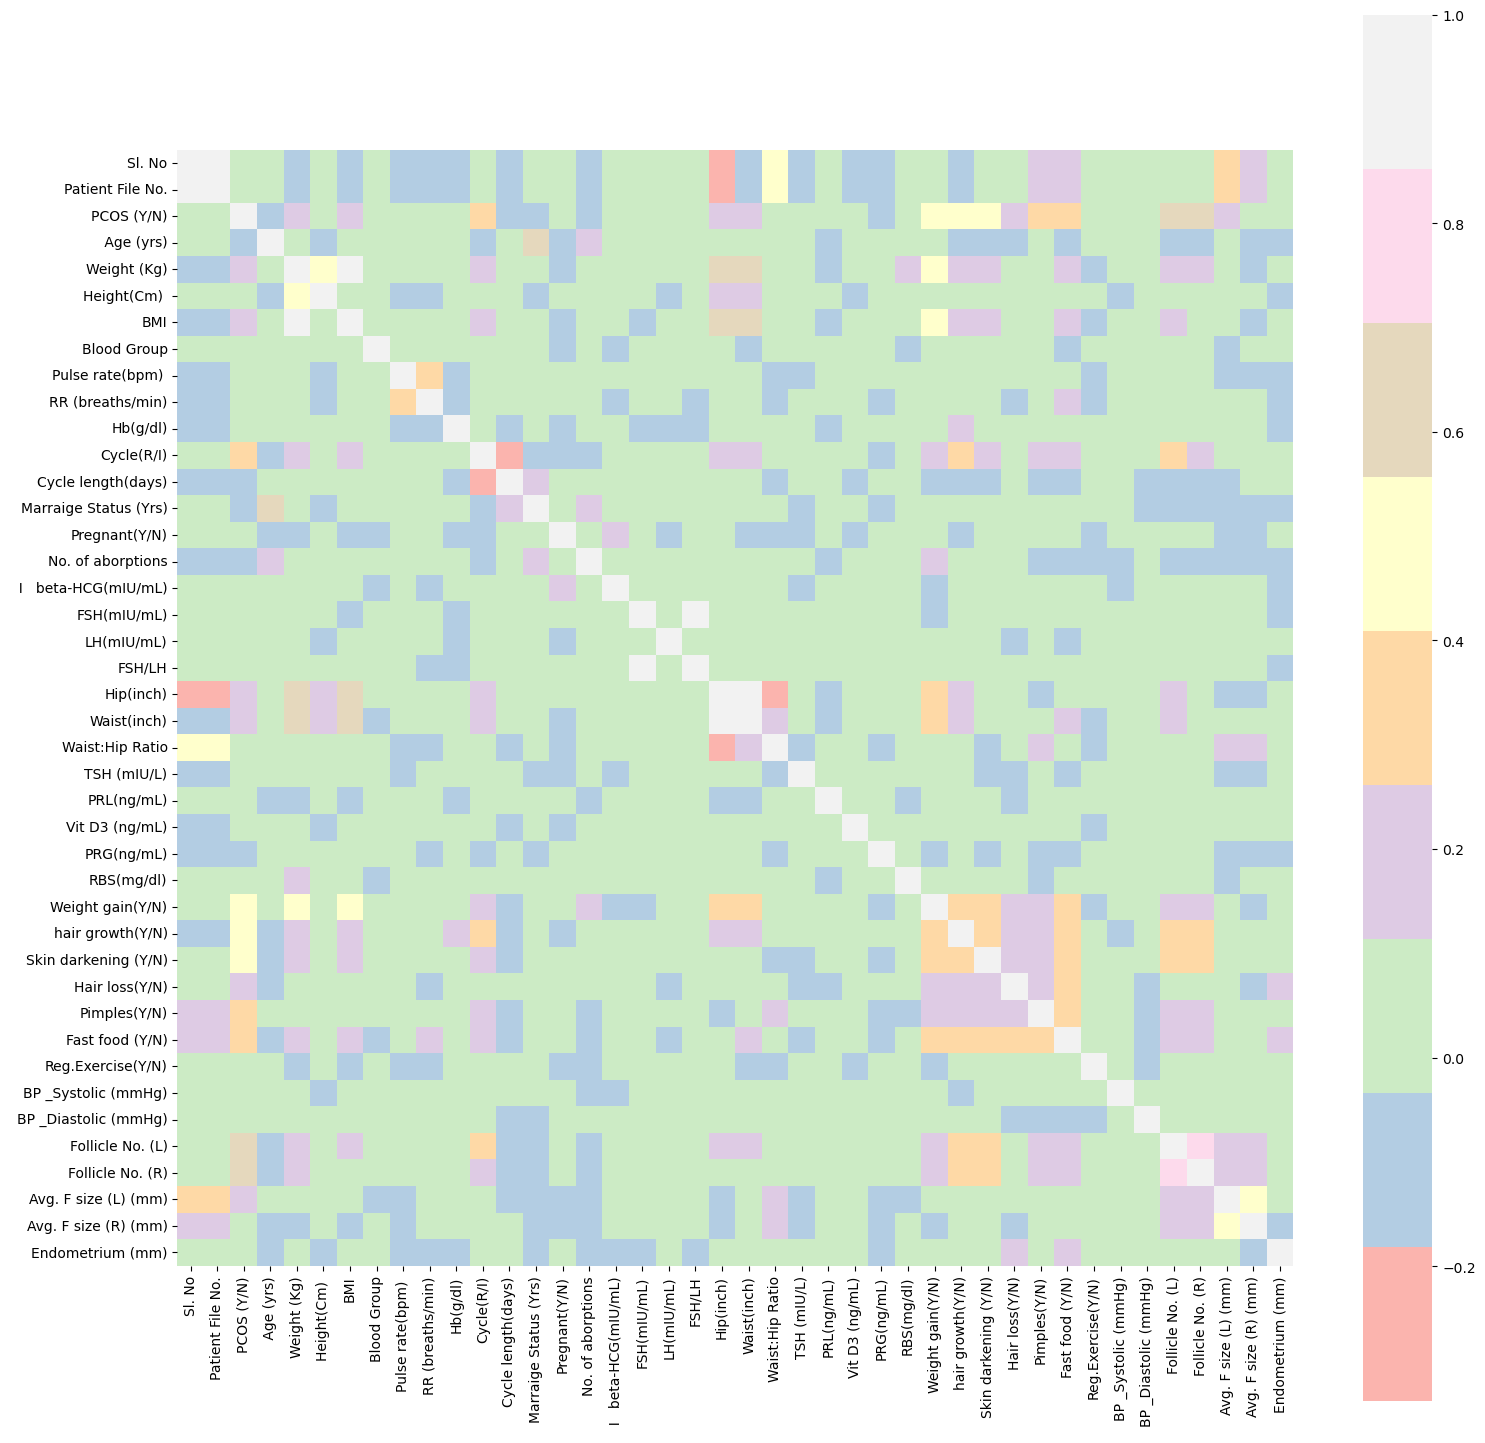

In [19]:
#Examaning a correlation matrix of all the features 
corrmat = data.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap="Pastel1", square=True)

In [20]:
#How all the features correlate with the PCOS 
corrmat = data.corr()
corrmat["PCOS (Y/N)"].sort_values(ascending=False)

PCOS (Y/N)                1.000000
Follicle No. (R)          0.648327
Follicle No. (L)          0.603346
Skin darkening (Y/N)      0.475733
hair growth(Y/N)          0.464667
Weight gain(Y/N)          0.441047
Cycle(R/I)                0.401644
Fast food (Y/N)           0.377933
Pimples(Y/N)              0.286077
Weight (Kg)               0.211938
BMI                       0.200176
Hair loss(Y/N)            0.172879
Waist(inch)               0.164598
Hip(inch)                 0.162297
Avg. F size (L) (mm)      0.132992
Endometrium (mm)          0.106648
Avg. F size (R) (mm)      0.097690
Pulse rate(bpm)           0.091821
Hb(g/dl)                  0.086553
Vit D3 (ng/mL)            0.085494
Height(Cm)                0.068254
Reg.Exercise(Y/N)         0.065337
LH(mIU/mL)                0.063879
Sl. No                    0.060998
Patient File No.          0.060960
RBS(mg/dl)                0.048922
BP _Diastolic (mmHg)      0.027927
RR (breaths/min)          0.025853
Waist:Hip Ratio     

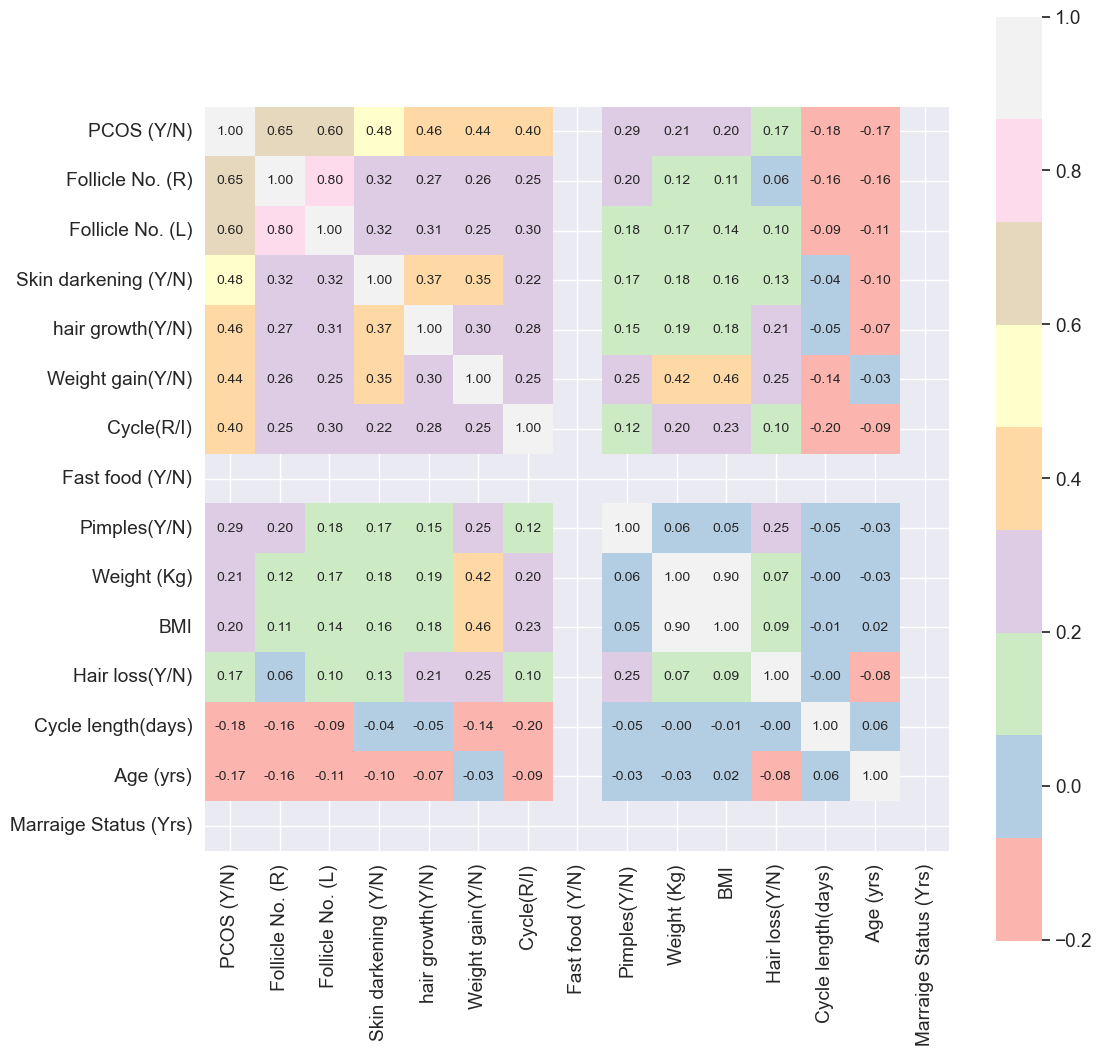

In [21]:
#Having a look at features bearing significant correlation

plt.figure(figsize=(12,12))
k = 12 #number of variables with positive for heatmap
l = 3 #number of variables with negative for heatmap
cols_p = corrmat.nlargest(k, "PCOS (Y/N)")["PCOS (Y/N)"].index 
cols_n = corrmat.nsmallest(l, "PCOS (Y/N)")["PCOS (Y/N)"].index
cols = cols_p.append(cols_n) 

cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True,cmap="Pastel1", annot=True, square=True, fmt='.2f',
                 annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Conclusion: It varies from 1 to -0.2. Highest correlation found was 0.64 whereas lowest as -0.17


In [22]:
data.columns = data.columns.str.strip()

In [23]:
data.rename(columns={'Age (yrs)': 'age', 'Weight (Kg)': 'weight'}, inplace=True)
print(data)

     Sl. No  Patient File No.  PCOS (Y/N)  age  weight  Height(Cm)        BMI  \
0         1               1.0           0   28    44.6     152.000  19.304017   
1         2               2.0           0   36    65.0     161.500  24.921163   
2         3               3.0           1   33    68.8     165.000  25.270891   
3         4               4.0           0   37    65.0     148.000  29.674945   
4         5               5.0           0   25    52.0     161.000  20.060954   
..      ...               ...         ...  ...     ...         ...        ...   
536     537             536.0           0   35    50.0     164.592  18.456637   
537     538             538.0           0   30    63.2     158.000  25.316456   
538     539             539.0           0   36    54.0     152.000  23.372576   
539     540             540.0           0   27    50.0     150.000  22.222222   
540     541             540.0           1   23    82.0     165.000  30.119376   

     Blood Group  Pulse rat

In [24]:
age_ = data.age.value_counts()

In [25]:
age_

28    45
32    44
35    37
30    37
27    35
29    34
31    33
36    33
26    32
34    29
33    25
38    20
25    18
23    18
40    15
24    15
37    15
41     9
39     9
22     8
20     6
42     6
45     4
44     3
21     3
43     3
47     3
48     1
46     1
Name: age, dtype: int64

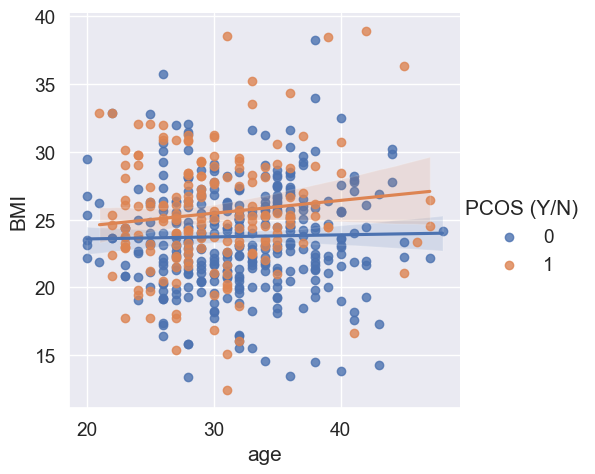

In [26]:
# Pattern of weight gain (BMI) over years in PCOS and Normal. 
fig= sns.lmplot(data =data,x="age",y="BMI", hue="PCOS (Y/N)" )
plt.show(fig)

Conclusion:Body mass index (BMI) is showing consistency for normal cases. Whereas for PCOS the BMI increases with age.


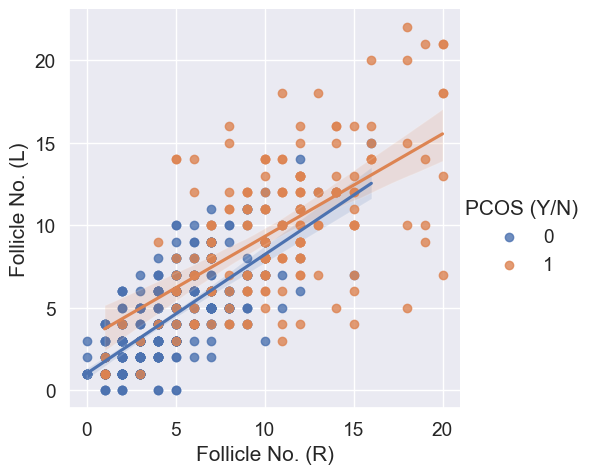

In [27]:
# Distribution of follicles in both ovaries. 
sns.lmplot(data =data,x='Follicle No. (R)',y='Follicle No. (L)', hue="PCOS (Y/N)")
plt.show()

Conclusion : The distribution of follicles in both ovaries Left and Right are not equal for women with PCOS in comparison with the "Normal" patient.  


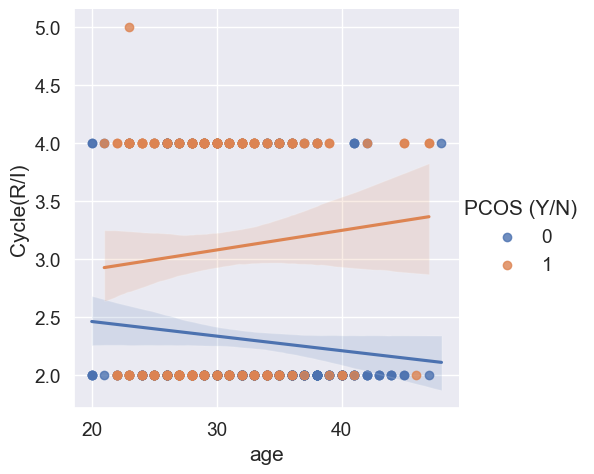

In [28]:
# cycle IR wrt age 
sns.lmplot(data =data,x="age",y="Cycle(R/I)", hue="PCOS (Y/N)")
plt.show()

Conclusion : 4 indicates irregular menstrual cycle whereas 2 indicates a regular menstrual cycle

The menstural cycle becomes more regular for normal cases with age. Whereas, for PCOS the irregularity increases with age.


C:\Users\Diksha\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 32.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


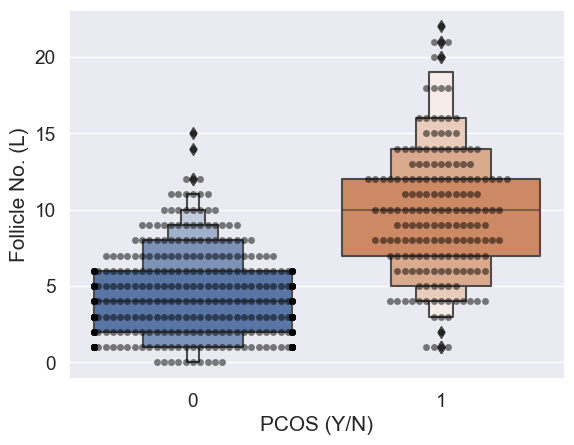

C:\Users\Diksha\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 30.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


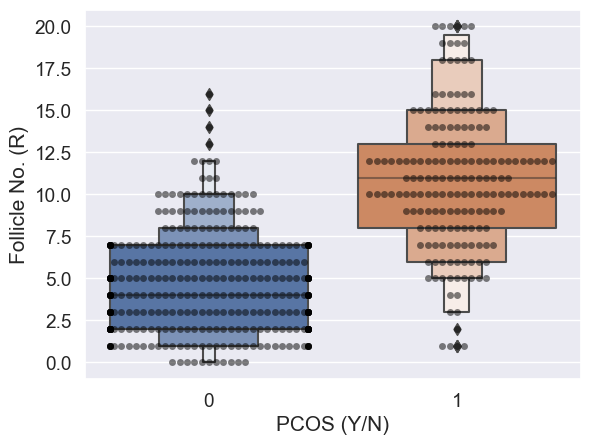

In [29]:
#Analyze the relationship between the presence of PCOS (PCOS diagnosis) and two specific features: 
#"Follicle No. (L)" (number of follicles in the left ovary) and "Follicle No. (R)" (number of follicles in the right ovary).


features = ["Follicle No. (L)","Follicle No. (R)"]
for i in features:
    sns.swarmplot(x=data["PCOS (Y/N)"], y=data[i], color="black", alpha=0.5 )
    sns.boxenplot(x=data["PCOS (Y/N)"], y=data[i])
    plt.show()

Conclusion :The number of follicles in women with PCOS is higher, as expected. And are unequal as well


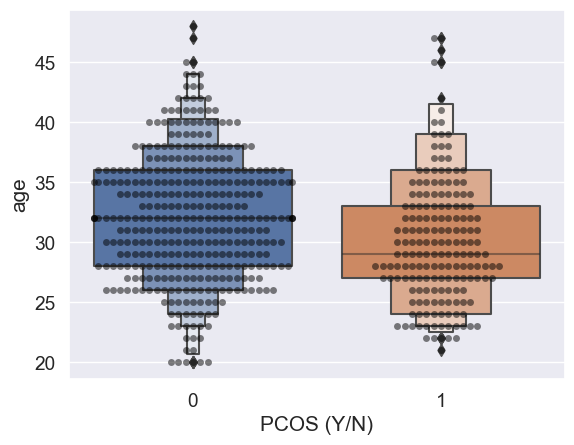

C:\Users\Diksha\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 8.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


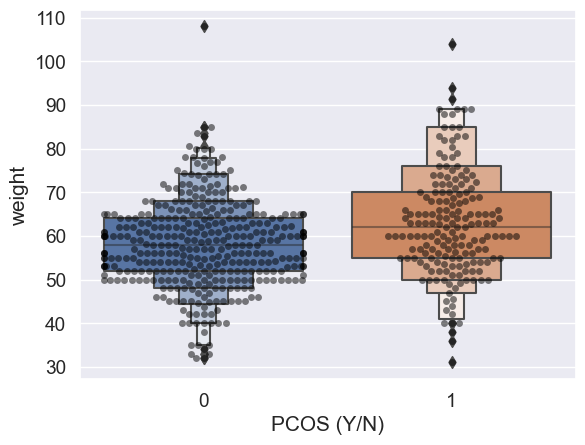

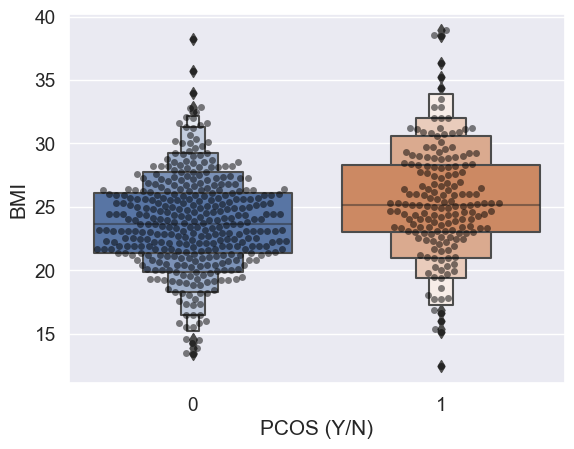

C:\Users\Diksha\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 20.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


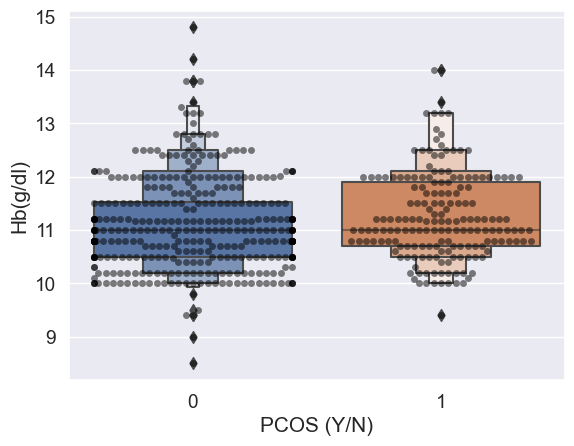

C:\Users\Diksha\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 53.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Diksha\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 7.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Diksha\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 65.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Diksha\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 26.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


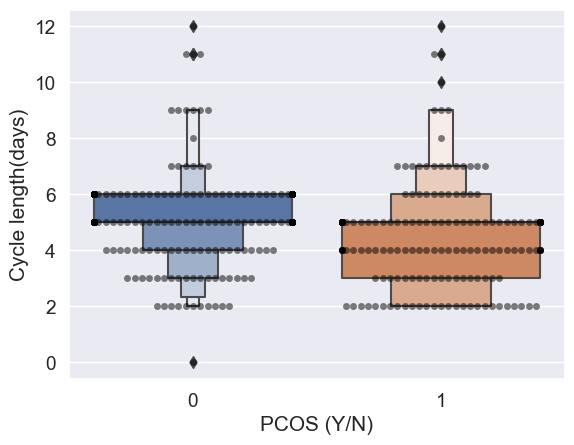

C:\Users\Diksha\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 12.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


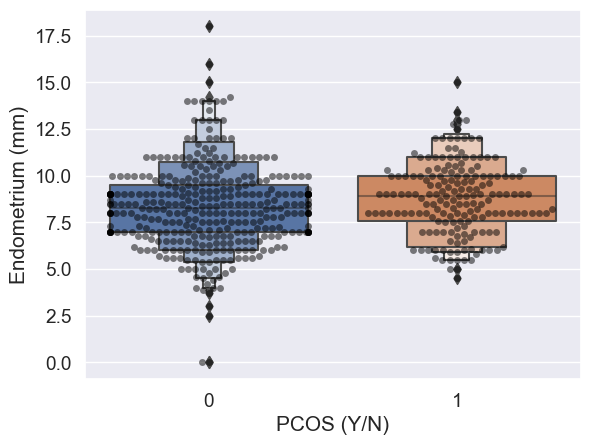

In [30]:
#Analyze the relationship between the presence of PCOS (PCOS diagnosis) and specific features: 
#"age,weight,BMI,Hb,Cycle length,Endometrium"

features = ["age","weight", "BMI", "Hb(g/dl)", "Cycle length(days)","Endometrium (mm)" ]
for i in features:
    sns.swarmplot(x=data["PCOS (Y/N)"], y=data[i], color="black", alpha=0.5 )
    sns.boxenplot(x=data["PCOS (Y/N)"], y=data[i])
    plt.show()

Conclusion : 1)The women with PCOS is less as compared to women without PCOS conditions considering the age factor but it is mostly seen in the women with age ranging between 25-30.
2)The weight ranges approximately between 35 to 85 kg for women without PCOS n there’s exception of 110 kg whereas for PCOS it varies from approximately 30 to 95 kg. therefore it is seen high weight range in women with PCOS  
3)The women who detected with PCOS have high BMI as compared to women who are normal.
4)The Endometrium for the women who are detected with PCOS ranges from 5 to 15 mm whereas women who are normal it ranges from 0 to 18 mm



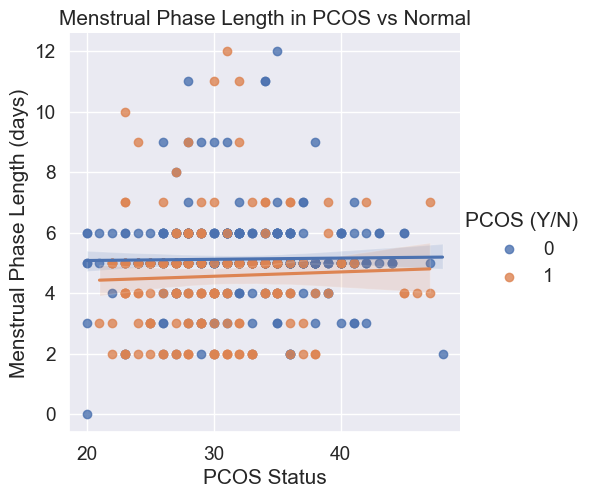

In [31]:
# Length of menstrual phase in PCOS vs normal 
# Create a scatterplot
color = ["teal", "plum"]
sns.lmplot(data =data, x= 'age', y= 'Cycle length(days)', hue="PCOS (Y/N)")
# Customize the plot
plt.title('Menstrual Phase Length in PCOS vs Normal')
plt.xlabel('PCOS Status')
plt.ylabel('Menstrual Phase Length (days)')

# Show the plot
plt.show()

Conclsuion:The length of the menstrual phase is overall consistent over different ages for normal cases. Whereas in the case of PCOS the length increased with age.


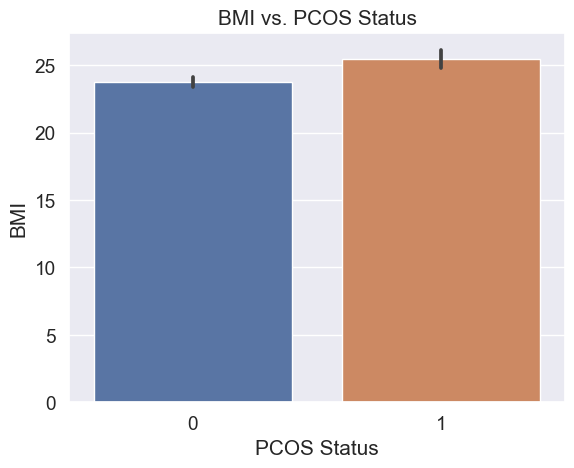

In [34]:
# Status of PCOS vs BMI
sns.barplot(x='PCOS (Y/N)', y='BMI', data=data)
plt.title('BMI vs. PCOS Status')
plt.xlabel('PCOS Status')
plt.ylabel('BMI')
plt.show()

Conclsuion:Women with PCOS have high BMI compaered to women who are nomral

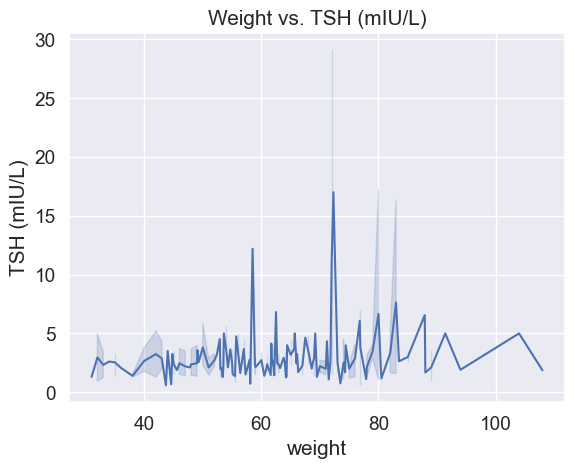

In [35]:
# Weight vs TSH(mIU/L) 
sns.lineplot(x='weight', y='TSH (mIU/L)', data=data)
plt.title('Weight vs. TSH (mIU/L)')
plt.xlabel('weight')
plt.ylabel('TSH (mIU/L)')
plt.show()

Conclusion : Women who weigh 60 and 75 kg have high TSH. In general, women who weigh beyond 50 kg have high TSH. 


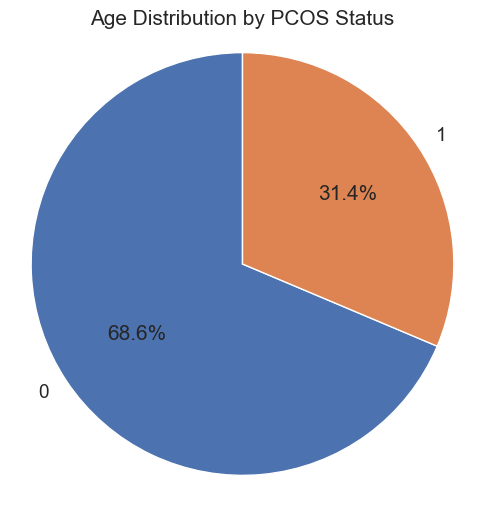

In [36]:
# PCOS status wrt age
age_grouped = data.groupby('PCOS (Y/N)')['age'].sum()
plt.figure(figsize=(6, 6))  # Set the figure size (optional)
plt.pie(age_grouped, labels=age_grouped.index, autopct='%1.1f%%', startangle=90)
plt.title('Age Distribution by PCOS Status')
plt.axis('equal')  
plt.show()

COnclusion: Patients detected with PCOS are less i.e. 31.4% compared to Patients without PCOS i.e. 68.6%


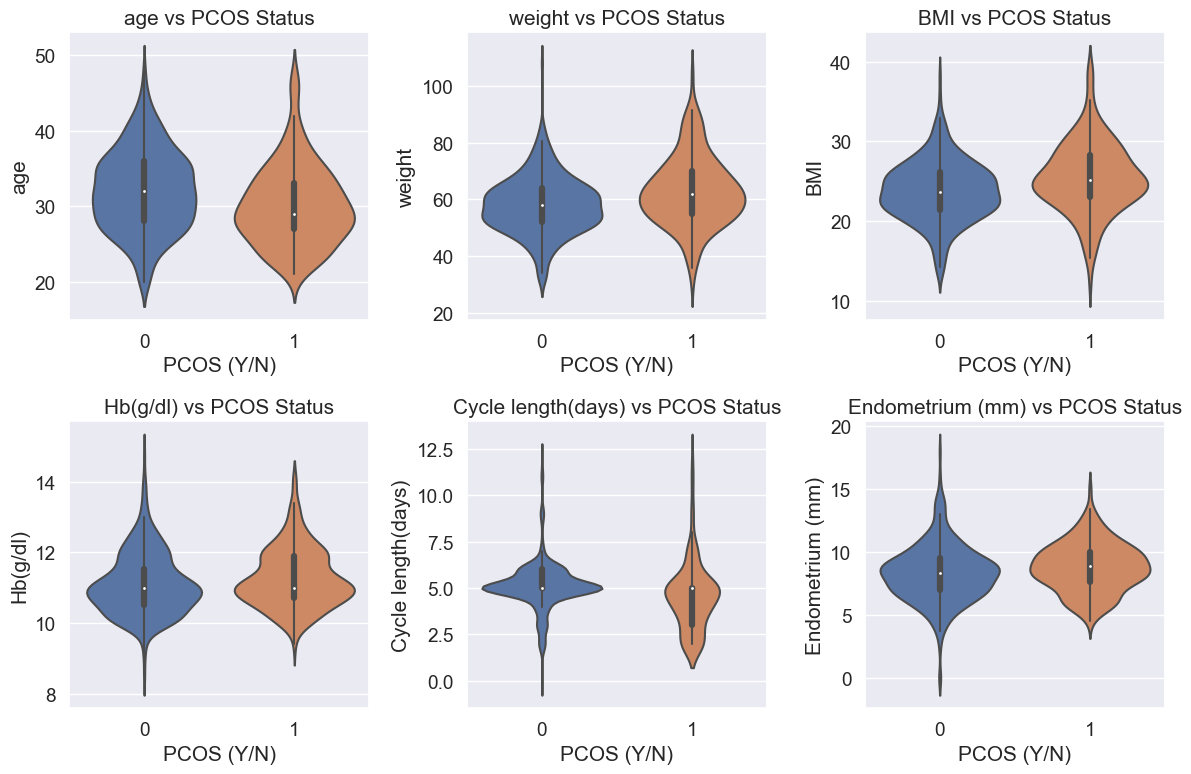

In [37]:
#  subplot with multiple violin plots
plt.figure(figsize=(12, 8))  
columns = ['age', 'weight', 'BMI', 'Hb(g/dl)', 'Cycle length(days)', 'Endometrium (mm)']
for i, column in enumerate(columns, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns for 6 plots
    sns.violinplot(x='PCOS (Y/N)', y=column, data=data)
    plt.title(f'{column} vs PCOS Status')
plt.tight_layout()
plt.show()


Conclusion :The data is roughly distributed along the median whereas for weight it can be seen there are outliers in normal for BMI.  It can clearly seen that for all three Hb, Menstrual length and endometrium there are outliers in normal. For PCOS, Hb and Endometrium data is evenly distributed about the median whereas Menstrual length have outliers


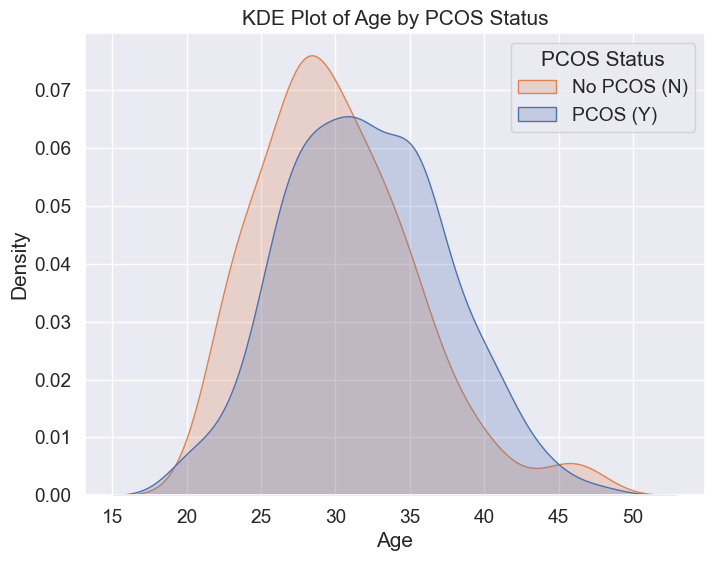

In [38]:
# Create a KDE plot
plt.figure(figsize=(8, 6)) 
sns.kdeplot(data=data, x='age', hue='PCOS (Y/N)', fill=True, common_norm=False)
plt.title('KDE Plot of Age by PCOS Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='PCOS Status', loc='upper right', labels=['No PCOS (N)', 'PCOS (Y)'])
plt.show()

Conclusion:The Women who are detected with PCOS ages 15 to 50 and peak is around 0.06 at age roughly 30 whereas women who are normal also ranges from15 to 50 and peak is around  0.08 at the age between 25 to 30


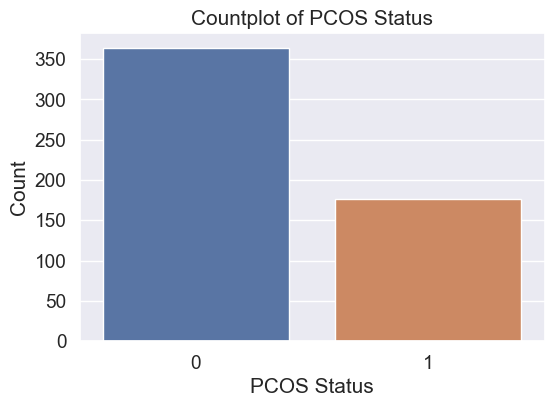

In [39]:
# Create a countplot
plt.figure(figsize=(6, 4))  
sns.countplot(data=data, x='PCOS (Y/N)')
plt.title('Countplot of PCOS Status')
plt.xlabel('PCOS Status')
plt.ylabel('Count')
plt.show()

Conclusion :The count for the women who are normal is roughly 350 whereas women who are detected with PCOS is  roughly 175


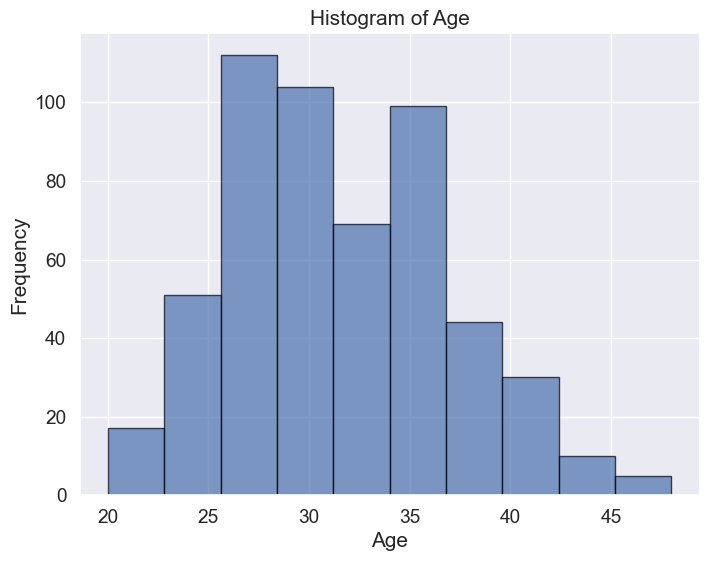

In [40]:
# histogram plot for age
age_data = data['age']
plt.figure(figsize=(8, 6)) 
plt.hist(age_data, bins=10, edgecolor='black', alpha=0.7)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Conclusion : 
Age varies from 20 to 50
Maximum patients are present in the range of  25 to 30


C:\Users\Diksha\AppData\Local\Temp\ipykernel_8520\2272597326.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=data, x='PCOS (Y/N)', y='age', ci='sd', palette='pastel')
C:\Users\Diksha\AppData\Local\Temp\ipykernel_8520\2272597326.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=data, x='PCOS (Y/N)', y='weight', ci='sd', palette='pastel')


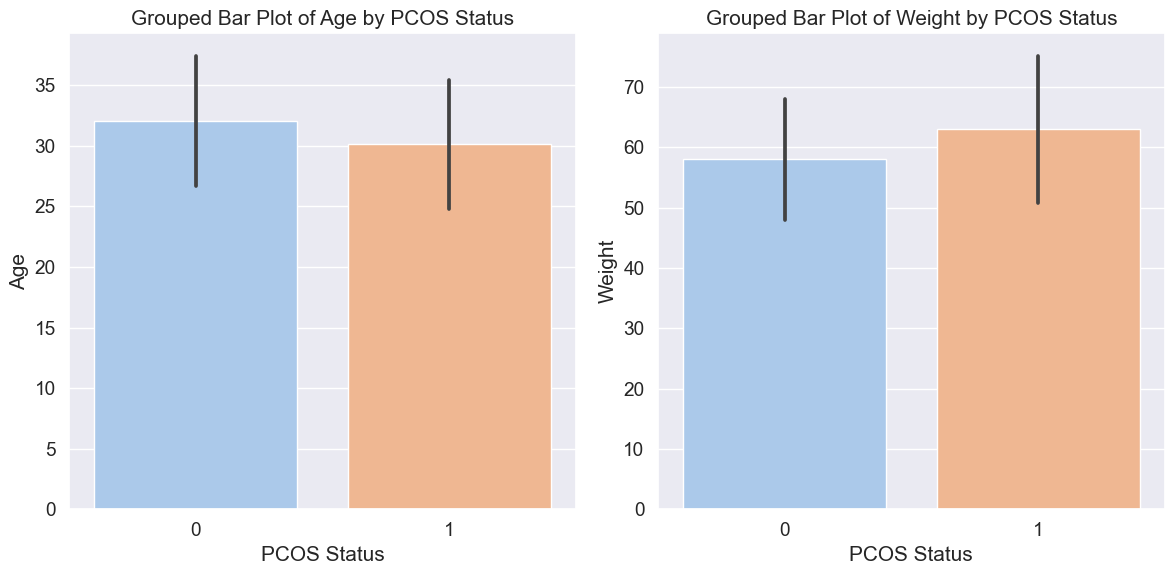

In [41]:
#plotting weight and age wrt PCOS
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(data=data, x='PCOS (Y/N)', y='age', ci='sd', palette='pastel')
plt.title('Grouped Bar Plot of Age by PCOS Status')
plt.xlabel('PCOS Status')
plt.ylabel('Age')
plt.subplot(1, 2, 2)
sns.barplot(data=data, x='PCOS (Y/N)', y='weight', ci='sd', palette='pastel')
plt.title('Grouped Bar Plot of Weight by PCOS Status')
plt.xlabel('PCOS Status')
plt.ylabel('Weight')
plt.tight_layout()
plt.show()


Conclusion: Average age of women is normal is around 32 whereas average age of women with PCOS is close to 28. Showing PCOS is diagnostic in early stages of age.
Average weight of women not diagnosed with PCOS is close to 58 whereas one diagnosed with PCOS is 62 which shows women with PCOS have higher weight than normal.


<Figure size 1000x600 with 0 Axes>

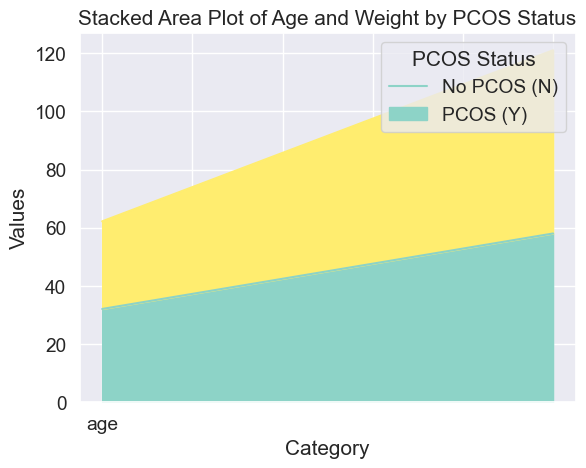

In [42]:
# stacked areaplot using PCOS status wrt age and weight
grouped_data = data.groupby('PCOS (Y/N)')[['age', 'weight']].mean()
stacked_data = grouped_data.T
plt.figure(figsize=(10, 6))
stacked_data.plot(kind='area', stacked=True, colormap='Set3')
plt.title('Stacked Area Plot of Age and Weight by PCOS Status')
plt.xlabel('Category')
plt.ylabel('Values')
plt.xticks(rotation=0)
plt.legend(title='PCOS Status', loc='upper right', labels=['No PCOS (N)', 'PCOS (Y)'])
plt.show()

Conclusion : Women with PCOS  have a slightly lower average age (around 30 years) compared to those without PCOS (around 32 years). Additionally, Women with PCOS have a higher average weight (around 63 kg) compared to those without PCOS (around 58 kg).


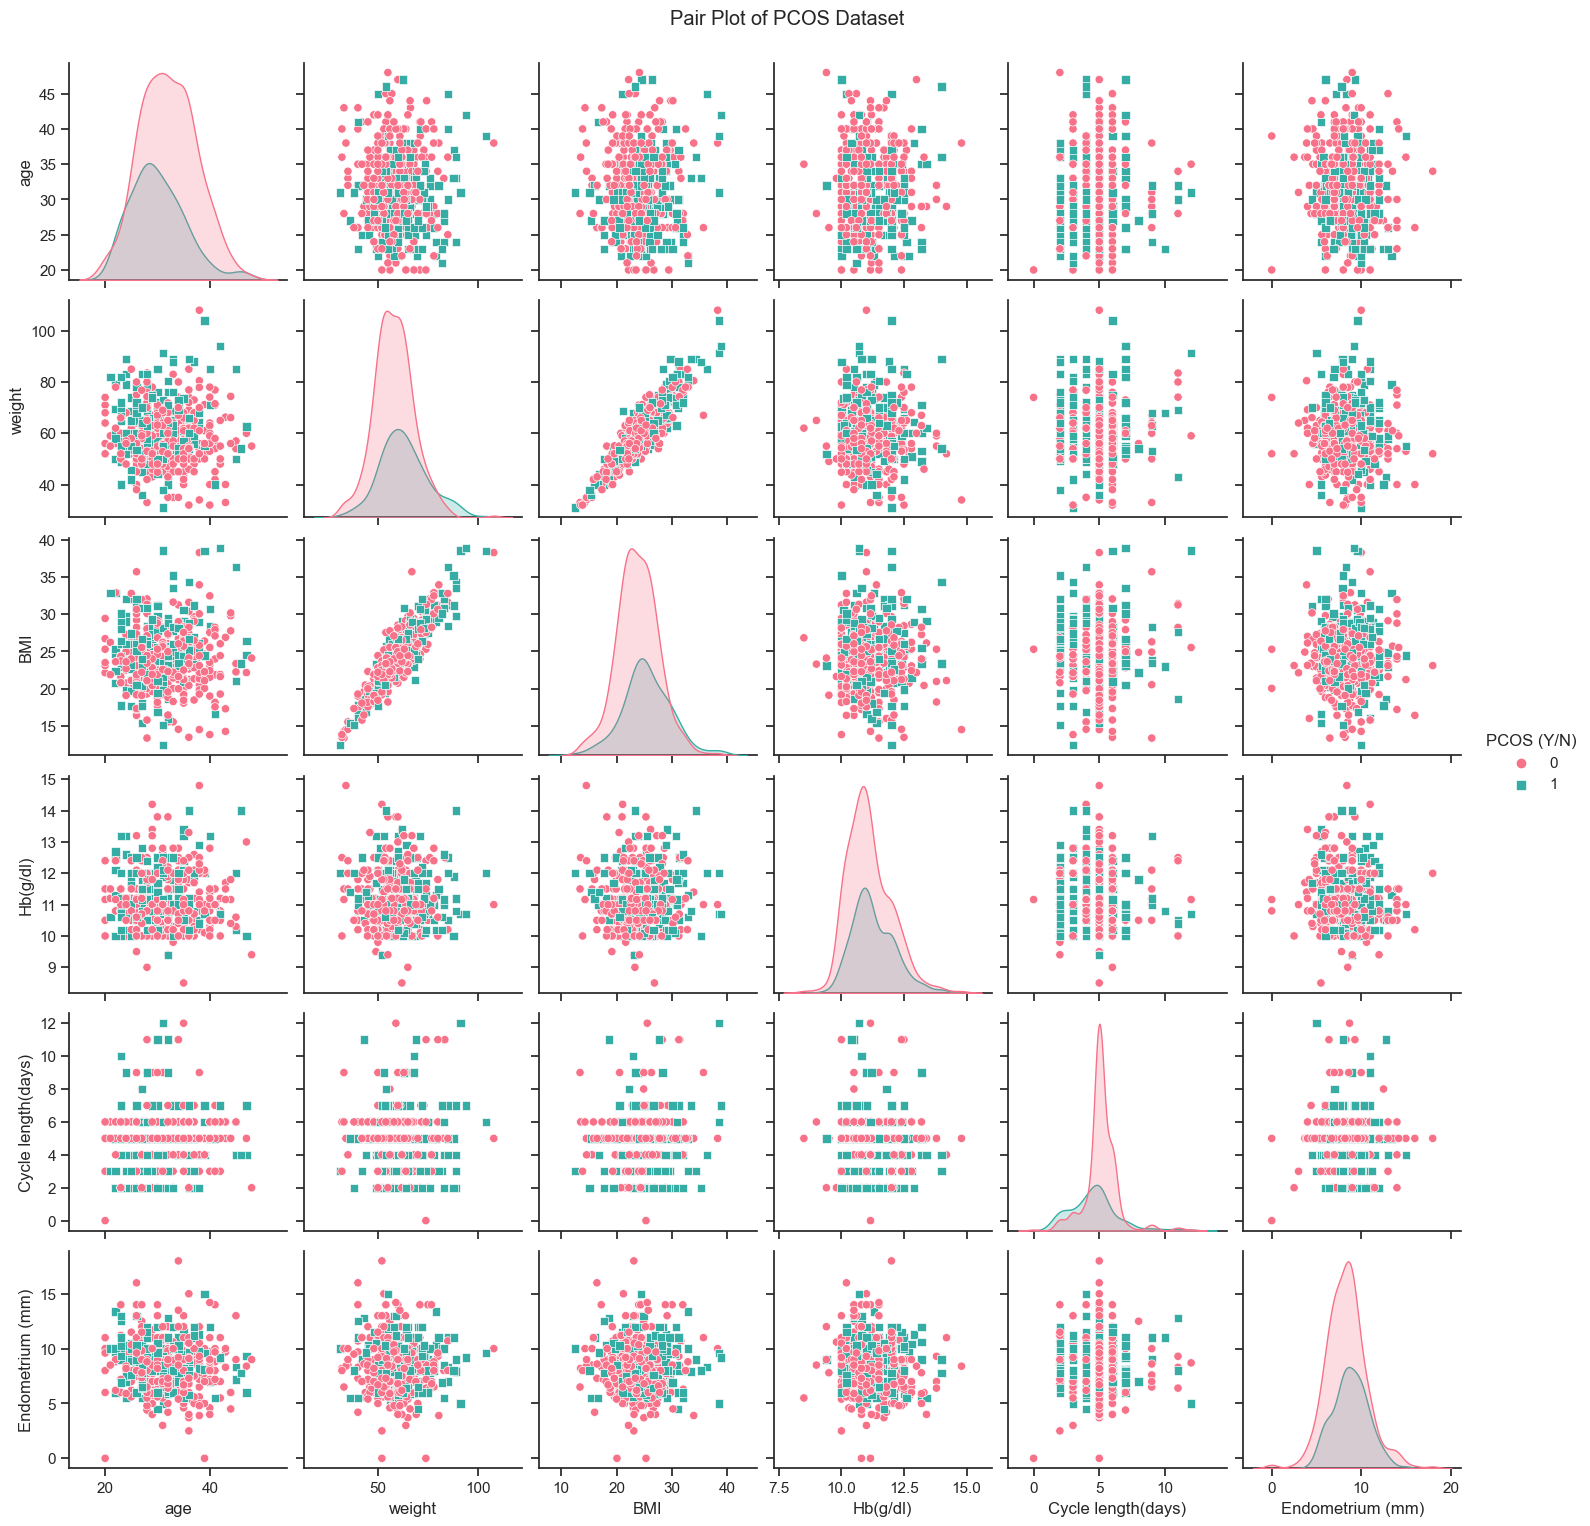

In [43]:
# relevant columns for the pair plot
selected_columns = ['age', 'weight', 'BMI', 'Hb(g/dl)', 'Cycle length(days)', 'Endometrium (mm)', 'PCOS (Y/N)']
sns.set(style='ticks') 
sns.pairplot(data[selected_columns], hue='PCOS (Y/N)', palette='husl', markers=["o", "s"])
plt.suptitle('Pair Plot of PCOS Dataset', y=1.02)
plt.show()

# Detection of Outliers

In [44]:
#Detection of Outliers
from scipy import stats

z_scores = stats.zscore(data['Follicle No. (R)'])
z_score_outliers = (z_scores < -3) | (z_scores > 3)
z_score_outlier_rows = data[z_score_outliers]
print("Outliers Detected by Z-Score:")
print(z_score_outlier_rows)
# Set a threshold for Z-scores (e.g., 3)
threshold = 3

# Filter out rows with Z-scores above the threshold
data_no_outliers1 = data[(z_scores < threshold) & (z_scores > -threshold)]

Outliers Detected by Z-Score:
     Sl. No  Patient File No.  PCOS (Y/N)  age  weight  Height(Cm)        BMI  \
26       27              27.0           1   30    76.0       160.0  29.687500   
117     118             118.0           1   28    68.0       155.0  28.303850   
169     170             170.0           1   33    59.6       163.0  22.432158   
294     295             295.0           1   28    55.5       144.0  26.765046   
320     321             321.0           1   33    64.0       162.0  24.386526   
520     521             521.0           1   27    50.0       168.0  17.715419   

     Blood Group  Pulse rate(bpm)  RR (breaths/min)  ...  Pimples(Y/N)  \
26          15.0               75              18.0  ...             1   
117         18.0               74              20.0  ...             1   
169         11.0               72              20.0  ...             1   
294         18.0               72              20.0  ...             1   
320         18.0               7

In [45]:
#Detection of Outliers
from scipy import stats

z_scores = stats.zscore(data_no_outliers1['Follicle No. (L)'])
z_score_outliers = (z_scores < -3) | (z_scores > 3)
z_score_outlier_rows = data_no_outliers1[z_score_outliers]
print("Outliers Detected by Z-Score:")
print(z_score_outlier_rows)
# Set a threshold for Z-scores (e.g., 3)
threshold = 3

# Filter out rows with Z-scores above the threshold
data_no_outliers2 = data_no_outliers1[(z_scores < threshold) & (z_scores > -threshold)]

Outliers Detected by Z-Score:
     Sl. No  Patient File No.  PCOS (Y/N)  age  weight  Height(Cm)        BMI  \
50       51              51.0           1   23    68.0      172.00  22.985398   
450     451             451.0           1   34    69.0      167.64  24.552391   
464     465             465.0           1   34    54.0      153.00  23.068051   
509     510             509.0           1   46    54.0      152.00  23.372576   

     Blood Group  Pulse rate(bpm)  RR (breaths/min)  ...  Pimples(Y/N)  \
50          15.0               72              16.0  ...             1   
450         15.0               80              18.0  ...             1   
464         16.0               72              18.0  ...             0   
509         18.0               74              20.0  ...             0   

     Fast food (Y/N)  Reg.Exercise(Y/N)  BP _Systolic (mmHg)  \
50               0.0                  0                110.0   
450              1.0                  0                110.0   
4

In [46]:
#Detection of Outliers
from scipy import stats

z_scores = stats.zscore(data_no_outliers2['BMI'])
z_score_outliers = (z_scores < -3) | (z_scores > 3)
z_score_outlier_rows = data_no_outliers2[z_score_outliers]
print("Outliers Detected by Z-Score:")
print(z_score_outlier_rows)
# Set a threshold for Z-scores (e.g., 3)
threshold = 3

# Filter out rows with Z-scores above the threshold
data_no_outliers3 = data_no_outliers2[(z_scores < threshold) & (z_scores > -threshold)]

Outliers Detected by Z-Score:
     Sl. No  Patient File No.  PCOS (Y/N)  age  weight  Height(Cm)        BMI  \
79       80              80.0           0   38   108.0     168.000  38.265306   
97       98              98.0           1   31    91.4     154.000  38.539383   
244     245             245.0           1   39   104.0     164.400  38.479526   
477     478             478.0           1   42    94.0     155.448  38.900714   

     Blood Group  Pulse rate(bpm)  RR (breaths/min)  ...  Pimples(Y/N)  \
79          14.0               80              20.0  ...             0   
97          15.0               78              24.0  ...             1   
244         15.0               72              18.0  ...             1   
477         16.0               74              18.0  ...             0   

     Fast food (Y/N)  Reg.Exercise(Y/N)  BP _Systolic (mmHg)  \
79               0.0                  0                110.0   
97               1.0                  0                110.0   
2

In [47]:
#Detection of Outliers
from scipy import stats

z_scores = stats.zscore(data_no_outliers3['Avg. F size (L) (mm)'])
z_score_outliers = (z_scores < -3) | (z_scores > 3)
z_score_outlier_rows = data_no_outliers3[z_score_outliers]
print("Outliers Detected by Z-Score:")
print(z_score_outlier_rows)
# Set a threshold for Z-scores (e.g., 3)
threshold = 3

# Filter out rows with Z-scores above the threshold
data_no_outliers4 = data_no_outliers3[(z_scores < threshold) & (z_scores > -threshold)]

Outliers Detected by Z-Score:
     Sl. No  Patient File No.  PCOS (Y/N)  age  weight  Height(Cm)        BMI  \
18       19              19.0           0   31    52.4     159.000  20.727028   
42       43              43.0           0   28    33.0     157.000  13.387967   
75       76              76.0           0   36    72.0     154.000  30.359251   
78       79              79.0           0   37    48.0     150.000  21.333333   
143     144             144.0           0   32    45.0     150.000  20.000000   
146     147             147.0           0   36    85.0     164.000  31.603212   
411     412             412.0           0   40    53.0     150.000  23.555556   
461     462             462.0           0   33    55.0     158.496  21.894049   

     Blood Group  Pulse rate(bpm)  RR (breaths/min)  ...  Pimples(Y/N)  \
18          17.0               72              18.0  ...             0   
42          18.0               78              18.0  ...             0   
75          18.0  

In [48]:
#Detection of Outliers
from scipy import stats

z_scores = stats.zscore(data_no_outliers4['Endometrium (mm)'])
z_score_outliers = (z_scores < -3) | (z_scores > 3)
z_score_outlier_rows = data_no_outliers4[z_score_outliers]
print("Outliers Detected by Z-Score:")
print(z_score_outlier_rows)
# Set a threshold for Z-scores (e.g., 3)
threshold = 3

# Filter out rows with Z-scores above the threshold
data_no_outliers = data_no_outliers4[(z_scores < threshold) & (z_scores > -threshold)]

Outliers Detected by Z-Score:
     Sl. No  Patient File No.  PCOS (Y/N)  age  weight  Height(Cm)        BMI  \
38       39              39.0           0   36    53.0       158.0  21.230572   
39       40              40.0           0   20    74.0       171.0  25.306932   
47       48              48.0           0   26    40.0       156.0  16.436555   
77       78              78.0           0   34    52.0       150.0  23.111111   
82       83              82.0           0   39    52.0       161.0  20.060954   
211     212             212.0           1   39    55.0       150.0  24.444444   

     Blood Group  Pulse rate(bpm)  RR (breaths/min)  ...  Pimples(Y/N)  \
38          18.0               78              22.0  ...             0   
39          18.0               74              16.0  ...             0   
47          18.0               74              18.0  ...             0   
77          11.0               72              18.0  ...             0   
82          11.0               7

In [49]:
#Data after removal of outliers
data_no_outliers

,Sl. No,Patient File No.,PCOS (Y/N),age,weight,Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,1.0,0,28,44.6,152.000,19.304017,15.0,78,22.0,...,0,1.0,0,110.0,80.0,3,3,18.0,18.0,8.5
1,2,2.0,0,36,65.0,161.500,24.921163,15.0,74,20.0,...,0,0.0,0,120.0,80.0,3,5,15.0,14.0,3.7
2,3,3.0,1,33,68.8,165.000,25.270891,11.0,72,18.0,...,1,1.0,0,120.0,80.0,13,15,18.0,20.0,10.0
3,4,4.0,0,37,65.0,148.000,29.674945,18.0,72,20.0,...,0,0.0,0,120.0,80.0,2,2,15.0,14.0,7.5
4,5,5.0,0,25,52.0,161.000,20.060954,11.0,72,28.0,...,0,0.0,0,120.0,80.0,3,4,16.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,537,536.0,0,35,50.0,164.592,18.456637,17.0,72,16.0,...,0,0.0,0,110.0,80.0,1,0,17.5,10.0,6.7
537,538,538.0,0,30,63.2,158.000,25.316456,15.0,72,18.0,...,0,0.0,0,110.0,80.0,9,7,19.0,18.0,8.2
538,539,539.0,0,36,54.0,152.000,23.372576,18.0,74,20.0,...,0,0.0,0,110.0,80.0,1,0,18.0,9.0,7.3
539,540,540.0,0,27,50.0,150.000,22.222222,15.0,74,20.0,...,1,0.0,0,110.0,80.0,7,6,18.0,16.0,11.5


# Linear Regression

In [50]:
# Import libraries for building and training model
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler 
from sklearn.compose import ColumnTransformer 
import joblib 

In [51]:
# formation of data for X
categorical_cols = ['Weight gain(Y/N)','hair growth(Y/N)','Skin darkening (Y/N)', 
                    'Pimples(Y/N)','Fast food (Y/N)','Hair loss(Y/N)']
encoder = OneHotEncoder (drop='first',sparse=False)
encoder_cols = pd.DataFrame(encoder.fit_transform(data_no_outliers[categorical_cols]), columns=encoder.get_feature_names_out(categorical_cols))
numerical_cols = ['weight','BMI','Pulse rate(bpm)','Endometrium (mm)','Cycle(R/I)',
                  'Avg. F size (R) (mm)','Avg. F size (L) (mm)','Follicle No. (R)','Follicle No. (L)',
                    'Waist(inch)', 'Hip(inch)']
SS = StandardScaler ()
SS_cols = pd.DataFrame(SS.fit_transform(data_no_outliers[numerical_cols]), columns=SS.get_feature_names_out(numerical_cols))

C:\Users\Diksha\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [52]:
#categorical columns
encoder_cols

,Weight gain(Y/N)_1,hair growth(Y/N)_1,Skin darkening (Y/N)_1,Pimples(Y/N)_1,Fast food (Y/N)_1.0,Fast food (Y/N)_nan,Hair loss(Y/N)_1
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
508,0.0,0.0,0.0,0.0,0.0,0.0,0.0
509,1.0,0.0,0.0,0.0,0.0,0.0,0.0
510,0.0,0.0,0.0,0.0,0.0,0.0,0.0
511,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [53]:
# Numerical columns
SS_cols

,weight,BMI,Pulse rate(bpm),Endometrium (mm),Cycle(R/I),Avg. F size (R) (mm),Avg. F size (L) (mm),Follicle No. (R),Follicle No. (L),Waist(inch),Hip(inch)
0,-1.421337,-1.287940,1.072431,0.029978,-0.611906,0.761416,0.892915,-0.832549,-0.773273,-1.084095,-0.497198
1,0.536102,0.171540,0.181128,-2.356631,-0.611906,-0.455967,-0.080174,-0.349407,-0.773273,-0.516025,0.017041
2,0.900723,0.262408,-0.264524,0.775793,-0.611906,1.370107,0.892915,2.066305,1.848597,0.620115,0.531280
3,0.536102,1.406695,-0.264524,-0.467232,-0.611906,-0.455967,-0.080174,-1.074120,-1.035460,0.620115,1.045519
4,-0.711286,-1.091268,-0.264524,-0.715837,-0.611906,-0.455967,0.244189,-0.590978,-0.773273,-1.084095,-0.240078
...,...,...,...,...,...,...,...,...,...,...,...
508,-0.903192,-1.508112,-0.264524,-0.865000,-0.611906,-1.673349,0.730734,-1.557263,-1.297647,-2.220235,-2.554153
509,0.363386,0.274247,-0.264524,-0.119185,-0.611906,0.761416,1.217278,0.133735,0.799849,-0.516025,-1.011437
510,-0.519380,-0.230823,0.181128,-0.566674,-0.611906,-1.977695,0.892915,-1.557263,-1.297647,-1.652165,-2.039914
511,-0.903192,-0.529715,0.181128,1.521608,1.622312,0.152725,0.892915,-0.107836,0.275475,-2.220235,-2.554153


In [76]:
# independent variable X and dependent variable Y
X = pd.concat([encoder_cols, SS_cols],axis=1)
Y =  data_no_outliers['PCOS (Y/N)']

In [77]:
#independent variable
X

,Weight gain(Y/N)_1,hair growth(Y/N)_1,Skin darkening (Y/N)_1,Pimples(Y/N)_1,Fast food (Y/N)_1.0,Fast food (Y/N)_nan,Hair loss(Y/N)_1,weight,BMI,Pulse rate(bpm),Endometrium (mm),Cycle(R/I),Avg. F size (R) (mm),Avg. F size (L) (mm),Follicle No. (R),Follicle No. (L),Waist(inch),Hip(inch)
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.421337,-1.287940,1.072431,0.029978,-0.611906,0.761416,0.892915,-0.832549,-0.773273,-1.084095,-0.497198
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.536102,0.171540,0.181128,-2.356631,-0.611906,-0.455967,-0.080174,-0.349407,-0.773273,-0.516025,0.017041
2,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.900723,0.262408,-0.264524,0.775793,-0.611906,1.370107,0.892915,2.066305,1.848597,0.620115,0.531280
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.536102,1.406695,-0.264524,-0.467232,-0.611906,-0.455967,-0.080174,-1.074120,-1.035460,0.620115,1.045519
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.711286,-1.091268,-0.264524,-0.715837,-0.611906,-0.455967,0.244189,-0.590978,-0.773273,-1.084095,-0.240078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.903192,-1.508112,-0.264524,-0.865000,-0.611906,-1.673349,0.730734,-1.557263,-1.297647,-2.220235,-2.554153
509,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.363386,0.274247,-0.264524,-0.119185,-0.611906,0.761416,1.217278,0.133735,0.799849,-0.516025,-1.011437
510,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.519380,-0.230823,0.181128,-0.566674,-0.611906,-1.977695,0.892915,-1.557263,-1.297647,-1.652165,-2.039914
511,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.903192,-0.529715,0.181128,1.521608,1.622312,0.152725,0.892915,-0.107836,0.275475,-2.220235,-2.554153


In [78]:
#dependent variable (targeted column)
Y

0      0
1      0
2      1
3      0
4      0
      ..
536    0
537    0
538    0
539    0
540    1
Name: PCOS (Y/N), Length: 513, dtype: int64

In [79]:
#train the model; test size = 0.2 i.e. train size = 0.8 ; random state =0
X_train,X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2,random_state=0)

In [80]:
#build the model
model = LinearRegression()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

In [81]:
#intercept Bo
model.intercept_

0.11946750940242476


In [82]:
#coefficient B1
print(model.coef_)

[ 0.132298    0.20153663  0.11358228  0.0764332   0.06087865 -0.30366206
 -0.02268867  0.03053773 -0.03261001  0.05080879  0.00838407  0.05506824
 -0.01286489  0.02303668  0.18859397  0.04796226 -0.01945303  0.00595569]


In [83]:
#Evaluation Metrics
mae = mean_absolute_error(Y_test,y_pred)
mse= mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y_pred)
#adj_r2 = 1-(1-r2)*(n-1)/(n-p-1) where n - no. of samples= 517  p - no. of parameters(variables) = 19
adj_r2 = 1-(1-r2)*(517-1)/(517-19-1)
print('Mean Absolute Error',mae)
print('Mean Squared Error',mse)
print('Root Mean Absolute Error',rmse)
print('R Squared',r2)
print('Adjusted R Squared',adj_r2)


Mean Absolute Error 0.25465933925738227
Mean Squared Error 0.11192645162216047
Root Mean Absolute Error 0.3345541086613053
R Squared 0.5010807877060922
Adjusted R Squared 0.4820074174171902


In [84]:
# calculate SSR, SST, SSE
y_mean = np.mean(Y_test)
ssr = np.sum((y_pred - y_mean)**2)
print( 'SSR:',ssr)
sst = np.sum((Y_test - y_mean)**2)
print('SST:',sst)
sse = sst - ssr
print('SSE:',sse)

SSR: 15.115289173569728
SST: 23.106796116504853
SSE: 7.991506942935125


# Tuning

In [85]:
#import libraries for tuning
from sklearn.model_selection import  cross_val_score
from sklearn.linear_model import Ridge, Lasso

In [86]:
# tuning with linear regression
lr_model =LinearRegression()
lr_score = cross_val_score(lr_model,X_train,Y_train,cv=5)
lr_model.fit(X_train,Y_train)
lr_prediction =lr_model.predict(X_test)
lr_mae =mean_absolute_error(Y_test,lr_prediction)
lr_mse =mean_squared_error(Y_test,lr_prediction)
lr_rmse = np.sqrt(lr_mse)
lr_r2 = r2_score(Y_test,lr_prediction)
print('Linear mae',lr_mae)
print('Linear mse',lr_mse)
print('Linear rmse',lr_rmse)
print('Linear r2',lr_r2)

Linear mae 0.25465933925738227
Linear mse 0.11192645162216047
Linear rmse 0.3345541086613053
Linear r2 0.5010807877060922


In [87]:
#tuning with L1 regularization Lasso
lasso_model = Lasso(alpha=1.0)
lasso_score = cross_val_score(lasso_model,X_train,Y_train,cv=5)
lasso_model.fit(X_train,Y_train)
lasso_prediction =lasso_model.predict(X_test)
lasso_mae =mean_absolute_error(Y_test,lasso_prediction)
lasso_mse =mean_squared_error(Y_test,lasso_prediction)
lasso_rmse = np.sqrt(lasso_mse)
lasso_r2 = r2_score(Y_test,lr_prediction)
print('Lasso mae',lasso_mae)
print('Lasso mse',lasso_mse)
print('Lasso rmse',lasso_rmse)
print('Lasso r2',lasso_r2)

Lasso mae 0.43982950509116736
Lasso mse 0.22510017731008475
Lasso rmse 0.47444723343074174
Lasso r2 0.5010807877060922


In [75]:
#tuning with L2 regularization Ridge
ridge_model = Ridge(alpha=1.0)
ridge_score = cross_val_score(ridge_model,X_train,Y_train,cv=5)
ridge_model.fit(X_train,Y_train)
ridge_prediction =ridge_model.predict(X_test)
ridge_mae =mean_absolute_error(Y_test,ridge_prediction)
ridge_mse =mean_squared_error(Y_test,ridge_prediction)
ridge_rmse = np.sqrt(ridge_mse)
ridge_r2 = r2_score(Y_test,ridge_prediction)
print('ridge mae',ridge_mae)
print('ridge mse',ridge_mse)
print('ridge rmse',ridge_rmse)
print('ridge r2',ridge_r2)

ridge mae 0.25493758488536694
ridge mse 0.11216948859159596
ridge rmse 0.3349171369034376
ridge r2 0.4999974350973774


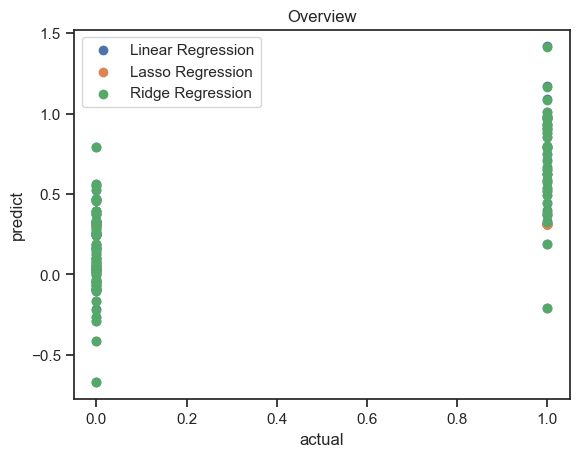

In [67]:
#graph for Overview
plt.scatter(Y_test,lr_prediction,alpha=1.0,label='Linear Regression')
plt.scatter(Y_test,lasso_prediction,alpha=1.0,label='Lasso Regression')
plt.scatter(Y_test,ridge_prediction,alpha=1.0,label='Ridge Regression')
plt.xlabel('actual')
plt.ylabel('predict')
plt.title('Overview')
plt.legend()

In [68]:
# MM estimator:huberregression
from sklearn.linear_model import HuberRegressor
X_scaled = SS.fit_transform(X_test)
huber = HuberRegressor(epsilon=1.35)
huber.fit(X_scaled, Y_test)
huber_prediction = huber.predict(X_scaled)
huber_mae =mean_absolute_error(Y_test,huber_prediction)
huber_mse =mean_squared_error(Y_test,huber_prediction)
huber_rmse = np.sqrt(huber_mse)
huber_r2 = r2_score(Y_test,huber_prediction)
print('huber mae:',huber_mae)
print('huber mse:',huber_mse)
print('huber rmse:',huber_rmse)
print('huber r2:',huber_r2)

huber mae: 0.20547421822128284
huber mse: 0.0763445399199478
huber rmse: 0.2763051572445723
huber r2: 0.6596894016761654


In [69]:
#LMS estimate
theta = np.random.randn(18, 100)
learning_rate = 0.01
n_iterations = 1000
for iteration in range(n_iterations):
    y_pred = X_test.dot(theta)
    errors = y_pred - Y_test
    
    # Compute the gradient of the mean squared error with respect to theta
    gradient = 2 * X_test.T.dot(errors) / len(X_test)
    
    # Update theta using the gradient and learning rate
    theta = -learning_rate * gradient

# The final theta values are the LMS estimates
lms_estimate_intercept = theta[0][0]
lms_estimate_coefficient = theta[1][0]

print("LMS Estimate Intercept:", lms_estimate_intercept)
print("LMS Estimate Coefficient:", lms_estimate_coefficient)

LMS Estimate Intercept: nan
LMS Estimate Coefficient: -0.0


In [70]:
# lts estimate
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor()

ransac.fit(X_test, Y_test)

lts_estimate_coeff = ransac.estimator_.coef_
lts_estimate_intercept = ransac.estimator_.intercept_

print("LTS Estimate Coefficients:", lts_estimate_coeff)
print("LTS Estimate Intercept:", lts_estimate_intercept)

lts_prediction = ransac.predict(X_test)
lts_mae =mean_absolute_error(Y_test,lts_prediction)
lts_mse =mean_squared_error(Y_test,lts_prediction)
lts_rmse = np.sqrt(lts_mse)
lts_r2 = r2_score(Y_test,huber_prediction)
print('lts mae:',lts_mae)
print('lts mse:',lts_mse)
print('lts rmse:',lts_rmse)
print('lts r2:',lts_r2)

C:\Users\Diksha\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Diksha\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


LTS Estimate Coefficients: [ 0.07110726  0.          0.07110726  0.09452163 -0.02341437  0.
  0.07110726 -0.0561669  -0.09499509  0.04173863  0.06590338  0.21118192
  0.04328236 -0.00759475 -0.0456674   0.01227789 -0.01921514  0.04971766]
LTS Estimate Intercept: 0.22738391266933022
lts mae: 0.3304131527037141
lts mse: 0.16202794405533405
lts rmse: 0.40252694823493995
lts r2: 0.6596894016761654


In [71]:
#theil-sen regressor
from sklearn.linear_model import TheilSenRegressor
theil_sen = TheilSenRegressor()
theil_sen.fit(X_test, Y_test)
theil_sen_estimate_intercept = theil_sen.intercept_
theil_sen_estimate_coefficient = theil_sen.coef_[0]
print("Theil-Sen Estimate Intercept:", theil_sen_estimate_intercept)
print("Theil-Sen Estimate Coefficient:", theil_sen_estimate_coefficient)

ts_prediction = theil_sen.predict(X_test)
ts_mae =mean_absolute_error(Y_test,ts_prediction)
ts_mse =mean_squared_error(Y_test,ts_prediction)
ts_rmse = np.sqrt(ts_mse)
ts_r2 = r2_score(Y_test,ts_prediction)
print('ts mae:',ts_mae)
print('ts mse:',ts_mse)
print('ts rmse:',ts_rmse)
print('ts r2:',ts_r2)

Theil-Sen Estimate Intercept: 0.07311768074863662
Theil-Sen Estimate Coefficient: 0.22420063532153225
ts mae: 0.20758622790144296
ts mse: 0.07670345734095838
ts rmse: 0.27695389027951633
ts r2: 0.6580895046511649


In [72]:
# hyperparamter tuning
import lightgbm as lgb
X = pd.concat([encoder_cols, SS_cols],axis=1)
Y =  data_no_outliers['PCOS (Y/N)']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
rfc = lgb.LGBMClassifier(learning_rate=0.3374329294340775, max_bin=1023,
               min_child_samples=8, n_estimators=9, num_leaves=9,
               reg_alpha=0.0009765625, reg_lambda=4.305658316786484,
               verbose=-1)
rfc.fit(X_train, Y_train)

#Making prediction and checking the test set

pred_rfc = rfc.predict(X_test)
accuracy = accuracy_score(Y_test, pred_rfc)
print(accuracy)


0.8543689320388349
